In [17]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [18]:
# Load Data
df = pd.read_csv('diabetes_dirty.csv')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [19]:
# Separate independent variables (X) and dependent variable PROGRESSION as (Y)
X = df.drop('PROGRESSION', axis=1)
y = df['PROGRESSION']

In [23]:
# Split Data into 20% testing data and 80% traning and shuffle the data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [24]:
# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Train Model  
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
# Print Intercept Coefficients 
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Predict and Evaluate
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print("R-squared (Test):", r2)
residuals = y_test - y_pred

Intercept: 153.7365439093484
Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
R-squared (Test): 0.45260276297191915


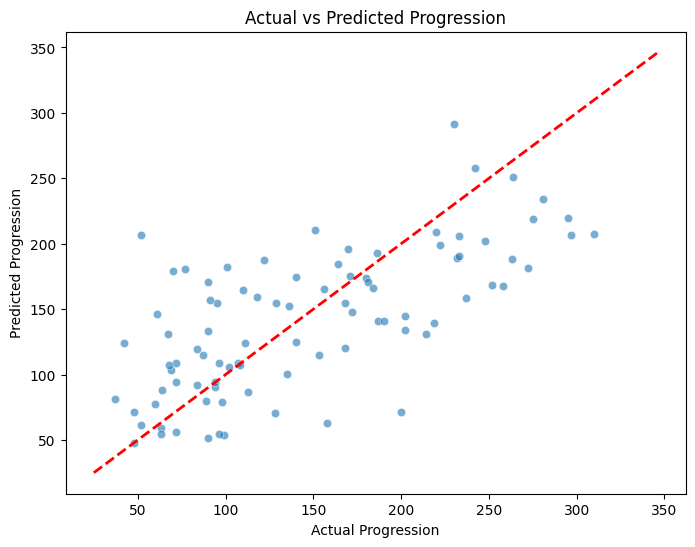

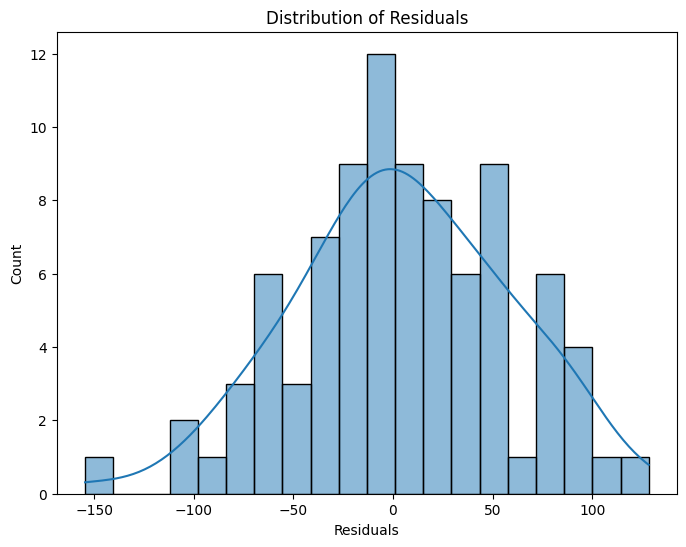

In [29]:
# Actual vs Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.title('Actual vs Predicted Progression')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()